# Data Project - Stock Market Analysis

## Purpose
The purpose of this project is to analyse the risks of technology stocks based on its previous performance history

## Approach
We will use pandas, pandas_datareader and yahoo finance to get stock data, visualise different aspects using matplotlib and try to predict stock prices through Monte Carlo Method

## Key questions
1.) What was the change in price of the stock over time?
<br>2.) What was the daily return of the stock on average?
<br>3.) What was the moving average of the various stocks?
<br>4.) What was the correlation between different stocks' closing prices?
<br>5.) What was the correlation between different stocks' daily returns?
<br>6.) How much value do we put at risk by investing in a particular stock?
<br>7.) How can we attempt to predict future stock behavior?

## Basic Analysis of Stock Information

Requesting stock information with pandas, and analyze basic attributes of a stock.

In [1]:
#Import Modules

import pandas as pd
from pandas import Series, DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# Import DataReader module to read Yahoo Finance Data

from pandas_datareader import data as pdr
from datetime import datetime
import yfinance as yf
yf.pdr_override() # Used Y finance to override pandas_datareader module due to errors

In [3]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = (datetime.now() - pd.DateOffset(years=1))

# For loop for grabbing yahoo finance data and setting as a DataFrame
for stock in tech_list:
    globals()[stock] = pdr.get_data_yahoo(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
AAPL.describe() # Calling APPL dataframe as a test

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,153.380681,155.273560,151.792600,153.669320,153.212982,7.302903e+07
std,13.610163,13.378489,13.869828,13.657408,13.752328,2.212788e+07
min,126.010002,127.769997,124.169998,125.019997,124.656975,3.519590e+07
25%,143.162502,146.277500,141.365005,143.885002,143.289043,5.701945e+07
50%,151.245003,153.654999,149.959999,151.744995,151.340019,6.935245e+07
75%,163.817505,165.750004,162.950001,164.892494,164.366611,8.215848e+07
max,186.729996,186.990005,184.270004,186.009995,186.009995,1.647624e+08


### Assign variables for analysis

In [5]:
# Assign variables to calculate different stocks 
# Apple = AAPL, Google = GOOG, Microsoft = MSFT, Amazon = AMZN
stock = AAPL

### 1. Change in stock price & trading volumn over time

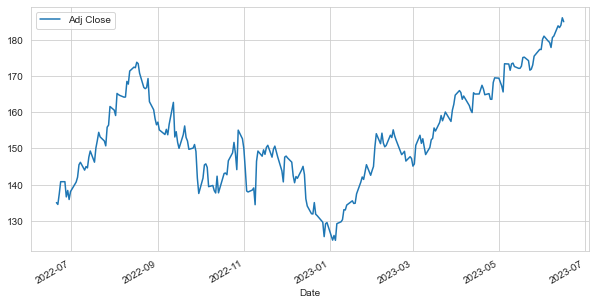

In [6]:
stock['Adj Close'].plot(legend = True,figsize=(10,5))
plt.show()

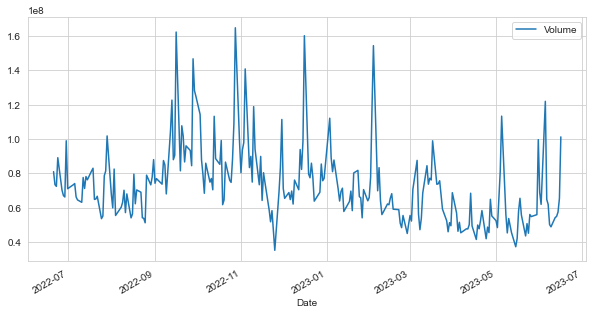

In [7]:
stock['Volume'].plot(legend = True,figsize = (10,5))
plt.show()

### 2. Calculating Moving Averages

In [8]:
ma_day = [10,20,50] # Number of days to calculate moving averages

# Create a loop to create new columns based on No. of moving average days
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    stock[column_name] = stock['Adj Close'].rolling(ma).mean() # Calculate rolling mean

<AxesSubplot:xlabel='Date'>

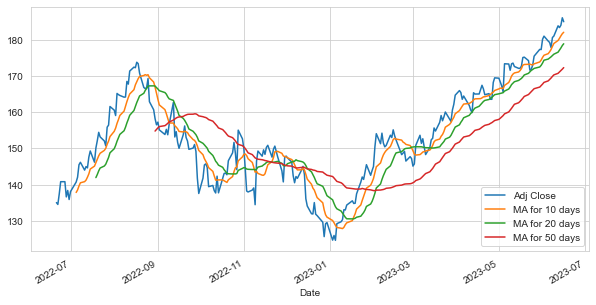

In [9]:
stock[['Adj Close','MA for 10 days','MA for 20 days', 'MA for 50 days']].plot(subplots=False,figsize = (10,5))

### 3. Calculate Daily Return

In [10]:
stock['Daily Return'] = stock['Adj Close'].pct_change()

<AxesSubplot:xlabel='Date'>

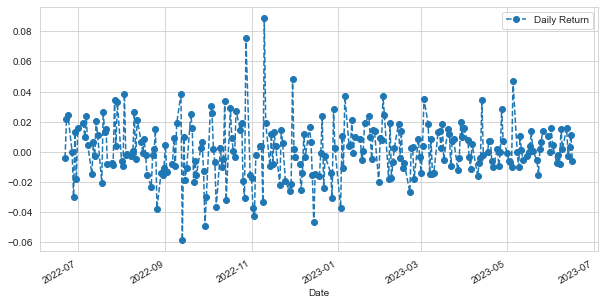

In [11]:
stock['Daily Return'].plot(figsize = (10,5),legend = True,linestyle = '--',marker = 'o')

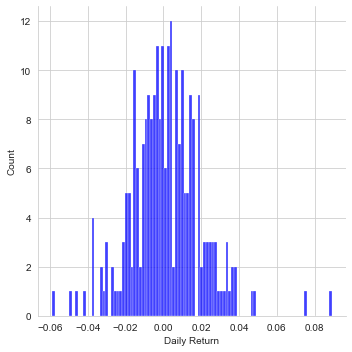

In [12]:
sns.displot(stock['Daily Return'].dropna(),bins=100,color = 'blue')

### Analyse returns of all stocks in our tech list

In [13]:
# Create a DataFrame with all Adj Close columns of each stocks in our tech_list
closing_df = pdr.get_data_yahoo(tech_list,start,end)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [14]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-06-21,135.063507,108.680000,112.014999,251.310776
2022-06-22,134.546616,108.949997,112.033997,250.706619
2022-06-23,137.449265,112.440002,112.684502,256.381744
2022-06-24,140.819138,116.459999,118.538002,265.137115
2022-06-27,140.819138,113.220001,116.622498,262.354034


In [15]:
# Calculating % change (return %)
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-06-21,NaN,NaN,NaN,NaN
2022-06-22,-0.003827,0.002484,0.000170,-0.002404
2022-06-23,0.021574,0.032033,0.005806,0.022637
2022-06-24,0.024517,0.035752,0.051946,0.034150
2022-06-27,0.000000,-0.027821,-0.016159,-0.010497


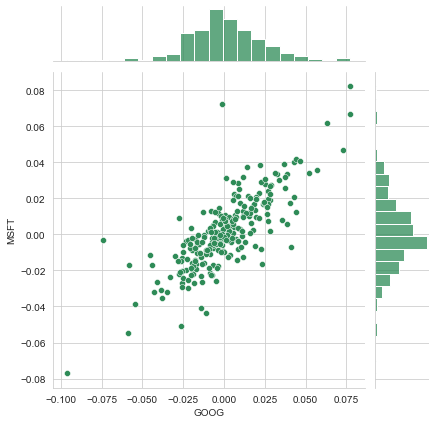

In [16]:
# Correlation Analysis of Google and Microsoft stock
sns.jointplot(data = tech_rets, x = 'GOOG',y = 'MSFT',kind = 'scatter',color = 'seagreen')

Based on Pearson Product correlation coefficient, the image below should give a sense of how correlated daily returns are.
<br>It appears Google and Microsoft are abot 40% positively correlated.

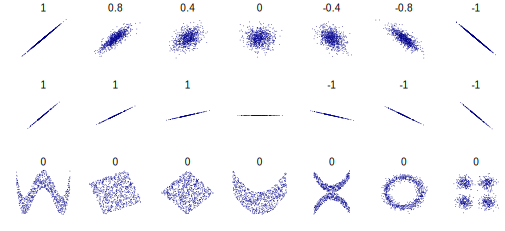

In [17]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

In [18]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-06-21,NaN,NaN,NaN,NaN
2022-06-22,-0.003827,0.002484,0.000170,-0.002404
2022-06-23,0.021574,0.032033,0.005806,0.022637
2022-06-24,0.024517,0.035752,0.051946,0.034150
2022-06-27,0.000000,-0.027821,-0.016159,-0.010497


### 4. Correlation between different stock's daily return

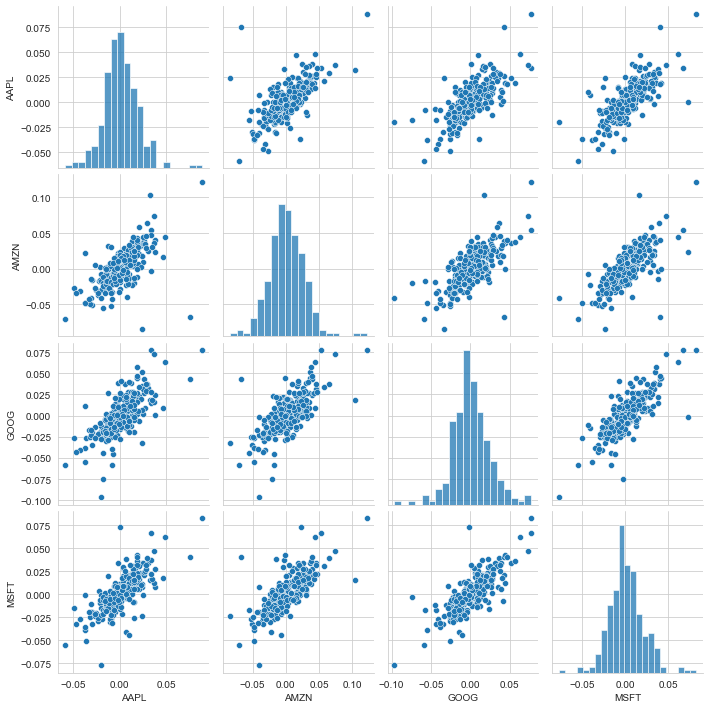

In [19]:
sns.pairplot(tech_rets.dropna())

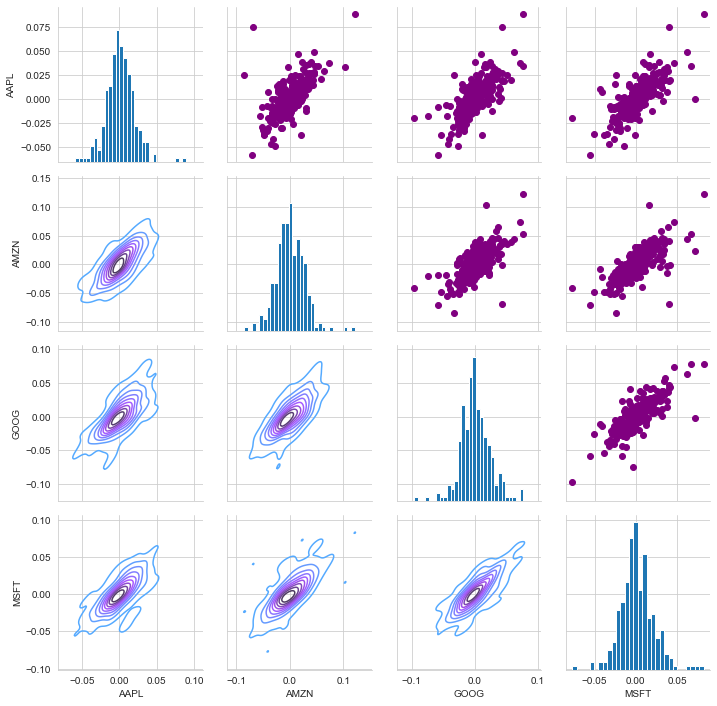

In [20]:
# Creating custom visualisations

returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:>

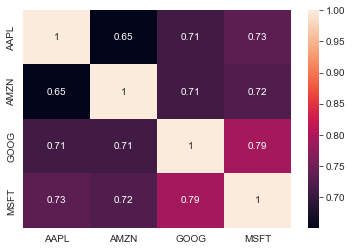

In [21]:
# Creating a heatmap based on daily return in correlation
sns.heatmap(tech_rets.dropna().corr(),annot = True)

Except for Amazon & Aapl, the daily returns for all stocks are fairly correlated at 71% - 79%

### 4. Correlation between different stock's Closing prices

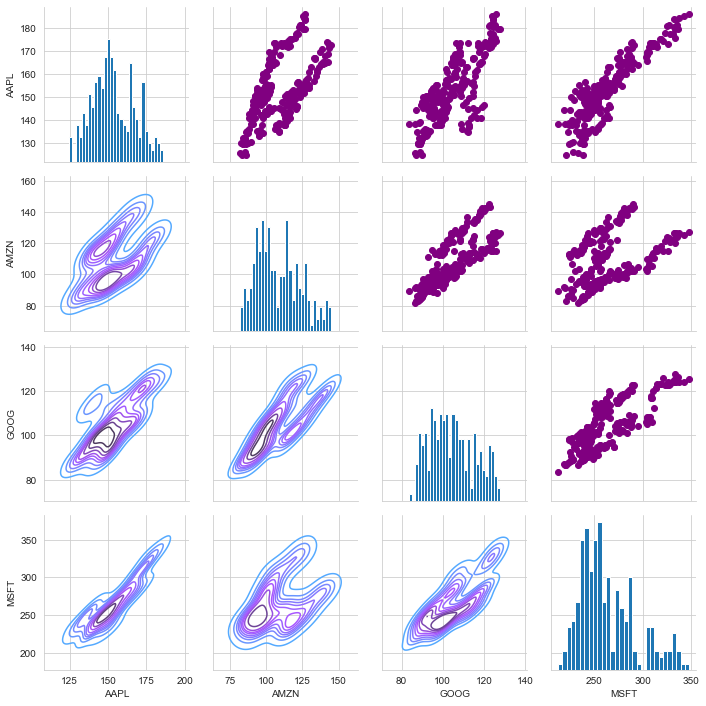

In [22]:
# Creating custom visualisations

returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:>

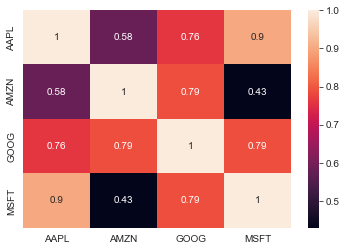

In [23]:
sns.heatmap(closing_df.dropna().corr(),annot = True)

The closing price between Microsoft vs Apple is the most correlated at 90%

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Apple and Microsoft had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

Great! Now that we've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.

### 5. Analyse the risk of the stock

One of the most basic ways to analyse risks using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

In [67]:
# Defining a new DataFrame as a cleaned version of the original data
rets = tech_rets.dropna()

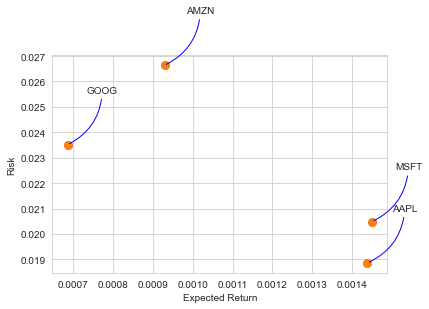

In [25]:
area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

plt.scatter(rets.mean(),rets.std(),s = area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3',color = 'blue'))

Based on the visualisation, it appears Apple and Microsoft yields the most returns with low risks.

### Value at Risk
We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. There are several methods we can use for estimating a value at risk.

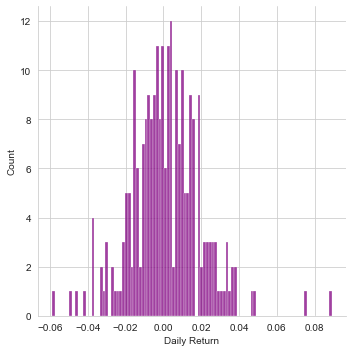

In [26]:
sns.displot(AAPL['Daily Return'].dropna(),bins = 100, color ='purple')

In [27]:
# 95% Confidence level
rets['AAPL'].quantile(0.05)

-0.0299394617937667

The 0.05 empirical quantile of daily returns is at -0.03. That means that with 95% confidence, our worst daily loss will not exceed 3.0%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.03 * 1,000,000 = $30,000.

Go ahead and repeat this for the other stocks in out portfolio, then afterwards we'll look at value at risk by implementing a Monte Carlo method.

### Value at Risk using the Monte Carlo method

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

In [65]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG'] 
sigma = rets.std()['GOOG'] # Volatility of a stock

In [60]:
# Creating a new function

def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale = sigma*np.sqrt(dt)) #Normal distribution of a 
        drift[x] = mu*dt
        price[x] = price[x-1]+(price[x-1]*(drift[x] + shock[x]))
    return price

In [61]:
GOOG

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-21,109.702003,112.672997,109.293503,112.014999,112.014999,39010000
2022-06-22,111.163002,113.769501,110.724297,112.033997,112.033997,23922000
2022-06-23,112.949997,113.196503,111.028999,112.684502,112.684502,24710000
2022-06-24,113.602997,118.637497,113.602997,118.538002,118.538002,39122000
2022-06-27,118.934998,119.250000,116.000748,116.622498,116.622498,32840000
...,...,...,...,...,...,...
2023-06-12,123.394997,124.750000,122.349998,124.349998,124.349998,22255700
2023-06-13,125.650002,125.860001,123.845001,124.430000,124.430000,19287700
2023-06-14,123.800003,124.790001,122.160004,124.379997,124.379997,24659600


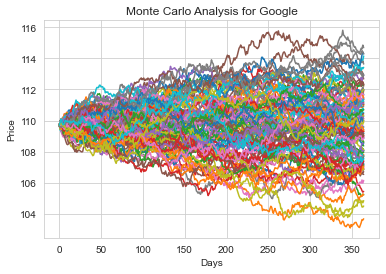

In [62]:
start_price = 109.70

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')
plt.show()

##  Creating a Histogram of all the final prices

In [63]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

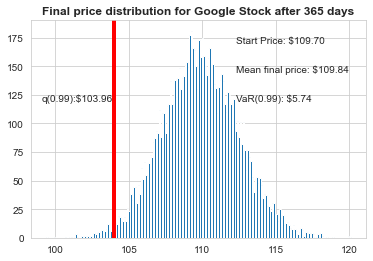

In [64]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

# Starting Price
plt.figtext(0.6,0.8, s = 'Start Price: $%.2f' %start_price)

# Mean ending price 
plt.figtext(0.6,0.7, "Mean final price: $%.2f" %simulations.mean())

# Variance of the price
plt.figtext(0.6,0.6, "VaR(0.99): $%.2f" % (start_price - q))

# Display 1% quantile
plt.figtext(0.15,0.6,"q(0.99):$%.2f" %q)

# Plot a line at the 1% quantile result
plt.axvline(x=q,linewidth=4,color = 'r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold')

Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $5.74 for every investment of 109.70 (the price of one inital google stock).

This basically means for every initial stock you purchase your putting about $5.74 at risk 99% of the time from our Monte Carlo Simulation.